# 3. Линейные модели и Градиентный спуск.

В данном ноутбуке вектор - всегда **столбцы**! 

Если нужно показать, что вектор - **строки**, он обозначается знаком транспонирования: $\boldsymbol{x}^T$

Однако, вектор объекта в матрице $X$ лежит **горизонтально**! (Признаки по столбцам, объекты по строкам)

Для удобства различия между вектором и матрицей будем обозначать $Y$ выборки как $\boldsymbol{y}$

Пререквизиты:
* $n$ - количество объектов в выборке
* $m$ - количество признаков у объекта
* $i$($i,j$) - итерация по элементам вектора (матрицы) (ставится снизу)
* $k$ - итерация по объектам-векторам (ставится снизу)
* $t$ - итерация по шагам градиентного спуска (ставится сверху)
* все векторы - **столбцы**
* $x$ - число, элемент вектора
* $\boldsymbol{x}$ - вектор
* $X$ - матрица
* $E_{a\times b}$ - единичная матрица
* $O_{a\times b}$ - нулевая матрица
* $I_{a\times b}$ - матрица из всех единиц

# 3.1 Матричные производные

Пусть $F(x): \mathbb{R}^n \to \mathbb{R}$ некоторая функция, от вектора $\boldsymbol{x}= (x_1, \ldots, x_n)$, тогда **градиентом** $F$ от $x$ называют следующую величину:

$$\nabla_{\boldsymbol{x}}F =
\frac{dF}{d\boldsymbol{x}} =  
\begin{pmatrix}
\frac{\partial F}{\partial x_1} \\
\frac{\partial F}{\partial x_2} \\
\vdots  \\
\frac{\partial F}{\partial x_n}
\end{pmatrix}
$$ 

Аналогично можно сделать для матрицы и тензоров большей размерности

Пусь $F(X): \mathbb{R}^{m \times n} \to \mathbb{R}$ некоторая функция, от матрицы $X_{m,n}$

$$\nabla_{X}F =
\frac{dF}{dX} =  
\begin{pmatrix}
\frac{\partial F}{\partial x_{1,1}} & \ldots & \frac{\partial F}{\partial x_{1, n}}  \\
\frac{\partial F}{\partial x_{2,1}}  & \ldots & \frac{\partial F}{\partial x_{2, n}} \\
\vdots  \\
\frac{\partial F}{\partial x_{m,1}}  & \ldots & \frac{\partial F}{\partial x_{n, n}}
\end{pmatrix}
$$ 

Резонный вопрос можно ли, чтобы $F(x)$ - возвращала вектор? Например $F(\boldsymbol{x}) = c\boldsymbol{x}$, где $\boldsymbol{x}$ - вектор, $c$ - константа.

Да, можно брать любые тензоры и брать производные любых размеров. 

Пусть $F(\boldsymbol{x}) = (f_1(\boldsymbol{x}), \ldots, f_m(\boldsymbol{x})): \mathbb{R}^{n} \to \mathbb{R^m}$, возьмем производную по $x$, тогда получим

$$\nabla_{\boldsymbol{x}}F =
\frac{dF}{d\boldsymbol{x}} =  
\begin{pmatrix}
\frac{\partial f_1(x)}{\partial x_{1}} & \ldots & \frac{\partial f_m(x)}{\partial x_{1}}  \\
\frac{\partial f_1(x)}{\partial x_{2}}  & \ldots & \frac{\partial f_m(x)}{\partial x_{2}} \\
\vdots  \\
\frac{\partial f_1(x)}{\partial x_{n}}  & \ldots & \frac{\partial f_m(x)}{\partial x_{n}}
\end{pmatrix}
$$ 

Сегодня мы будем пользоваться функциями только с образами в $\mathbb{R}$, кому интересно почитать [вот сюда](https://en.wikipedia.org/wiki/Matrix_calculus)

## Пример 1

Дано $y = \boldsymbol{x}^T\boldsymbol{x},  \quad \boldsymbol{x} \in \mathbb{R}^n$

Найти $\frac{dy}{d\boldsymbol{x}}$

$$
\frac{dy}{d\boldsymbol{x}} = \frac{d(\sum_{i=1}^{n}x_i^2)}{d\boldsymbol{x}} = 
\begin{pmatrix}
\frac{\partial \sum_{i=1}^{n}x_i^2}{\partial x_1} \\
\frac{\partial \sum_{i=1}^{n}x_i^2}{\partial x_2} \\
\vdots  \\
\frac{\partial \sum_{i=1}^{n}x_i^2}{\partial x_n}
\end{pmatrix}
=
\begin{pmatrix}
2x_1 \\
2x_2 \\
\vdots  \\
2x_n
\end{pmatrix}
=
2\boldsymbol{x}
$$ 

## Пример 2

Дано $ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $

Найти $\frac{dy}{dA}$ 

$$
\frac{dy}{dA} = \frac{d(\sum_{i=1}^{N}(AB)_{i,i})}{dA} = \frac{d(\sum_{i=1}^{N} \sum_{r=1}^{N}a_{i,r}b_{r,i})}{dA} =
\begin{pmatrix}
\frac{\partial \sum_{i=1}^{N}\sum_{r=1}^{N}a_{i,r}b_{r,i}}{\partial a_{1,1}} & \ldots & 
\frac{\partial \sum_{i=1}^{N}\sum_{r=1}^{N}a_{i,r}b_{r,i}}{\partial a_{1,N}} \\
\frac{\partial \sum_{i=1}^{N}\sum_{r=1}^{N}a_{i,r}b_{r,i}}{\partial a_{2,1}} & \ldots & 
\frac{\partial \sum_{i=1}^{N}\sum_{r=1}^{N}a_{i,r}b_{r,i}}{\partial a_{2,N}}\\
\vdots & \ldots & \vdots \\
\frac{\partial \sum_{i=1}^{N}\sum_{r=1}^{N}a_{i,r}b_{r,i}}{\partial a_{N,1}} & \ldots & 
\frac{\partial \sum_{i=1}^{N}\sum_{r=1}^{N}a_{i,r}b_{r,i}}{\partial a_{N,N}} 
\end{pmatrix} =
\begin{pmatrix}
b_{1,1} & \ldots & b_{N,1} \\
b_{1,2} & \ldots & b_{N,2} \\
\vdots  & \ldots & \vdots \\
b_{1,N} & \ldots & b_{N,N}
\end{pmatrix} = B^{T}
$$

# 3.2 Линейная регрессия
## Постановка задачи

Давайте вспомним, что такое задача линейной регрессии в рамках машинного обучения. 

У нас есть обучающая выборка $(X, \boldsymbol{y})$, c $n$ объектами и $m$ признаками. (Значит размер $X$ - $n\times m$)

Алгоритм решения выбирается из пространства линейных функций:

$a(\boldsymbol{x}_k) = w_0 + w_1x_{k, 1} + \ldots + w_mx_{k, m}$


## Точное решение 

Нам нужно найти такое $a(\cdot)$, чтобы решилась система уравнений
$$\begin{cases}
a(\boldsymbol{x}_1) = w_0 + w_1x_{1,1} + \ldots + w_mx_{1,m} =  y_1\\
\ldots \\
a(\boldsymbol{x}_k) = w_0 + w_1x_{k,1} + \ldots + w_mx_{k,m} =  y_k\\
\ldots \\
a(\boldsymbol{x}_n) = w_0 + w_1x_{n,1} + \ldots + w_mx_{n,m} =  y_n
\end{cases}$$

Давайте запишем в матричном виде, предварительно добавив к $X$ единичный столбец слева. $X = (I_{n\times 1}|X)$. Получим:

$$X\boldsymbol{w} = \boldsymbol{y}$$

С курса линейной алгебры мы помним, что система линейных уравнений имеет единственное решение, когда $X$ - квадратная, максимального ранга (нету линейно зависимых строк\столбцов). По сути, если у $X$ существует обратная, тогда:

$$\boldsymbol{w} = X^{-1}\boldsymbol{y}$$

Такое решение означает, что через $m = n$ точек прямой (из которых ни одна не лежит на плоскости) можно провести ровно одну плоскость.

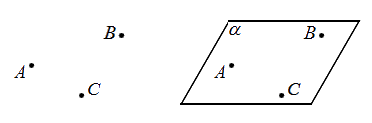

In [18]:
Image('images/плоскость.png')

Однако никто нам не гарантирует, что матрица $X$ будет удовлетворять нужным свойствам.

## MSE

Без ограничений общности можем считать, что в $X$ **отсутствуют** линейно-зависимые строки\столбцы (будем считать что их заранее убрали).

Необязательная сноска:
 * Более того, в практическом смысле у нас действительно не может быть линейно-зависимых строк, потому что объекты у нас берутся из некоторого пространства $\mathbb{X}$. Если оно непрерывно (хотя бы один признак - непрерывен), то вероятность попасть в одну точку пространства равна 0. 

* К тому же, к реально наблюдаемым данных добавляется нормальный шум, который представляет собой независимую случайную величину - значит все объекты независимы.

Пусть $n > m$. Тогда мы не можем провести через $n$ точек в пространстве размерности $m$ гиперплоскость. Соответственно решений системы $X\boldsymbol{w} = \boldsymbol{y}$ - нет.

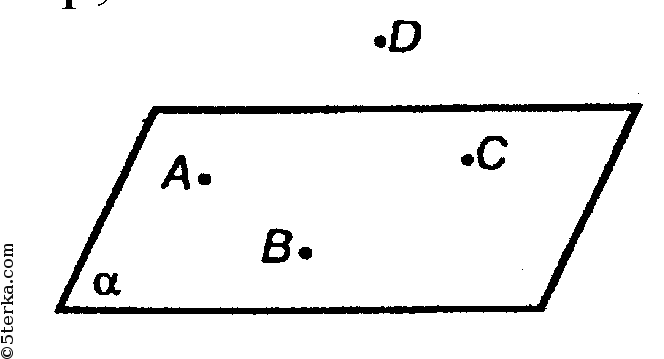

In [17]:
Image('images/плоскость2.png', width=500)

В этом случае давайте проводить плоскость такую, что расстояния от точек до этой плоскости будет минимальным.

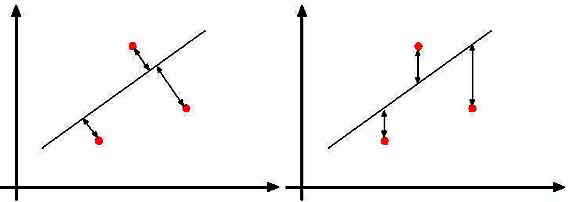

In [16]:
Image('images/расстояние.jpg')

Тут у нас есть вариант взять метрику эвклидову (квадраты расстояний $MSE$) или манхетонову (модуль расстояний $MAE$). Берем $MSE$, потому что ее можно легко дифференцировать (да, это действительно единственное объяснение)

И тут мы можем вспомнить, что мы уже видели раньше: функционал ошибки
$$Q(a, X, \boldsymbol{y}) =  MSE = \frac{1}{n}\sum_{k=1}^{n} (a(\boldsymbol{x}_k)-y_k)^2 \rightarrow min$$

Который можно записать в более аккуратном матричном виде:
$$L(\boldsymbol{w}) = \frac{1}{n}\lVert X\boldsymbol{w} - \boldsymbol{y}\rVert_2^2 \rightarrow min$$

$\lVert \boldsymbol{d} \rVert_2^2 = \sum_{i=1}^{n}d_1^2 + \ldots + d_n^2$ -квадрат нормы эвклидовой метрики

Теперь чтобы найти $w$ - применим единственно возможное действие, когда мы видим минимизацию линейной функции - возьмем производную по аргументу вектору или (тоже самое) возьмем частные производные каждого $w_i$

$$\nabla_{\boldsymbol{w}}L = \begin{cases}
\frac{\partial L}{\partial w_0} = \frac{1}{n}\sum_{k=1}^{n} 2x_{k, 0}(a(\boldsymbol{x}_k)-y_k)\\
\ldots \\
\frac{\partial L}{\partial w_i} = \frac{1}{n}\sum_{k=1}^{n} 2x_{k, i}(a(\boldsymbol{x}_k)-y_k)\\
\ldots \\
\frac{\partial L}{\partial w_m} = \frac{1}{n}\sum_{k=1}^{n} 2x_{k, m}(a(\boldsymbol{x}_k)-y_k)
\end{cases}$$

$\nabla_{\boldsymbol{w}}L$ - называется **градиентом** линейной функции $L$, по парамеру вектору $\boldsymbol{w}$ 

Если на эту систему внимательно посмотреть (или изучить матричное дифференцирование), можно понять, что данную систему можно записать тоже в матричном виде:

$$ \nabla_{\boldsymbol{w}}L = \frac{2}{n}X^{T}(X\boldsymbol{w} - \boldsymbol{y})$$

Осталось совершить последнее стандартное действие - приравнять производную к нулю вектору и решить матричное уравнение.

$$ 0 = \frac{2}{n}X^{T}(X\boldsymbol{w} - \boldsymbol{y})$$

$$ X^{T}X\boldsymbol{w} = X^{T}\boldsymbol{y}$$

$$ \boldsymbol{w} = (X^{T}X)^{-1}X^{T}\boldsymbol{y}$$

Теперь давайте подумаем, избавилось ли данное решение от предыдущих проблем:
1. Матрица $X^{T}X$ - действительно квадратная размера $m\times m$
2. $rank(X) = rank(X^{T}X)$ ([доказательство](https://math.stackexchange.com/questions/2807892/prove-that-textrankxtx-textrankx))
3. $X^{T}X$ - положительно определенная (каждый элемент больше 0)

Следовательно - обратная матрица $(X^{T}X)^{-1}$ - существует. А значит получили новое решение, для функционала $MSE$.

## А что если объектов мало?

В редком случае у нас может случиться так, что $m > n$ (признаков больше чем объектов). Значит у системы $X\boldsymbol{w} = \boldsymbol{y}$ имеется бесконечно много решений.

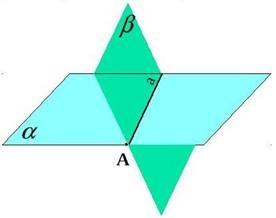

In [15]:
Image('images/плоскости.jpg')

Если же будем применять $MSE$, то получим, что матрица $X$ имеет ранг $n$, а значит матрица $X^{T}X$ - также имеет ранг $n$ (а не $m$, потому что $m > n$). В этом случае у нас опять не будет существовать решения.

В этом случае воcпользуемся еще одной эвристикой --- давайте найдем среди всех плоскостей плоскость с наименьшей нормой.
$$\lVert \boldsymbol{w} \rVert_2^2 \rightarrow \min$$

Тогда возьмем решение такого вида:
$$\boldsymbol{w} = X^{T}(XX^{T})^{-1}\boldsymbol{y}$$

- Почему это вообще решение? Можем проверить:

$$X\boldsymbol{w} = XX^{T}(XX^{T})^{-1}\boldsymbol{y} = \boldsymbol{y}$$

- Окей, а почему $(XX^{T})^{-1}$ - существует?

Потому что ранг $XX^{T}$ - матрица размера $n \times n$. В случае, когда $n < m$ у этой матрицы будет максимальный ранг $n$ - а значит существует обратная. (Получили интересную задачу в зависимости от того какой максимальный ранг у $X$ у нас существует либо $(XX^{T})^{-1}$ либо $(X^{T}X)^{-1}$)

Осталось доказать, что это решение с минимальной нормой. Обозначим $\boldsymbol{w}^{*} = X^{T}(XX^{T})^{-1}\boldsymbol{y}$

Возьмем, 
какое-нибудь другое решение системы: $\boldsymbol{w}^{**}$ (раз система неопределенная, то их бесконечно много) 
и рассмотрим его норму

$$||\boldsymbol{w}^{**}|| = ||\boldsymbol{w}^{**} + \boldsymbol{w}^{*} - \boldsymbol{w}^{*}|| = 
||\boldsymbol{w}^{*}|| + ||\boldsymbol{w}^{**} - \boldsymbol{w}^{*}|| + 2(\boldsymbol{w}^{**} - \boldsymbol{w}^{*})^{T}(\boldsymbol{w}^{*}) = 
||\boldsymbol{w}^{*}|| + ||\boldsymbol{w}^{**} - \boldsymbol{w}^{*}|| + 2(\boldsymbol{w}^{**} - \boldsymbol{w}^{*})^{T}X^T(XX^{T})^{-1}$$

Так как $\boldsymbol{w}^{**}$ и $\boldsymbol{w}^{*}$ - оба решения, то $X(\boldsymbol{w}^{**} - \boldsymbol{w}^{*}) = \boldsymbol{0}$, значит и 
$(\boldsymbol{w}^{**} - \boldsymbol{w}^{*})^{T}X^T = \boldsymbol{0}^T$ Получаем

$$||\boldsymbol{w}^{**}|| = ||\boldsymbol{w}^{*}|| + ||\boldsymbol{w}^{**} - \boldsymbol{w}^{*}||$$

Что означает, что норма нового решения либо больше, либо совпадает с уже существующим. 
Значит $\boldsymbol{w}^{*}$ - минимальное решение.

# 3.3 Регуляризация 

## L2 Ridge

На самом деле минимизация $MSE$ и минимизация нормы $\lVert \boldsymbol{w} \rVert_2^2$ - это крайности одной и той же задачи:

$$L =\frac{1}{n}(\frac{1}{2}\lVert X\boldsymbol{w} - \boldsymbol{y} \rVert_2^2 + \frac{\lambda}{2}\lVert \boldsymbol{w} \rVert_2^2) \rightarrow \min$$

То есть мы можем учитывать оба условия для нахождения наилучшего решения, варьируя между ними с помощью параметра $\lambda$.

Точным решением этой задачи минимазации будет
$$\boldsymbol{w} = (X^TX + \lambda E)^{-1}X^{T}\boldsymbol{y}$$

(можете вывести это самостоятельно)

Круто то, что матрица $(X^{T}X + \lambda E)$ - всегда будет иметь обратную.

### Регуляризация предотвращает переобучение!

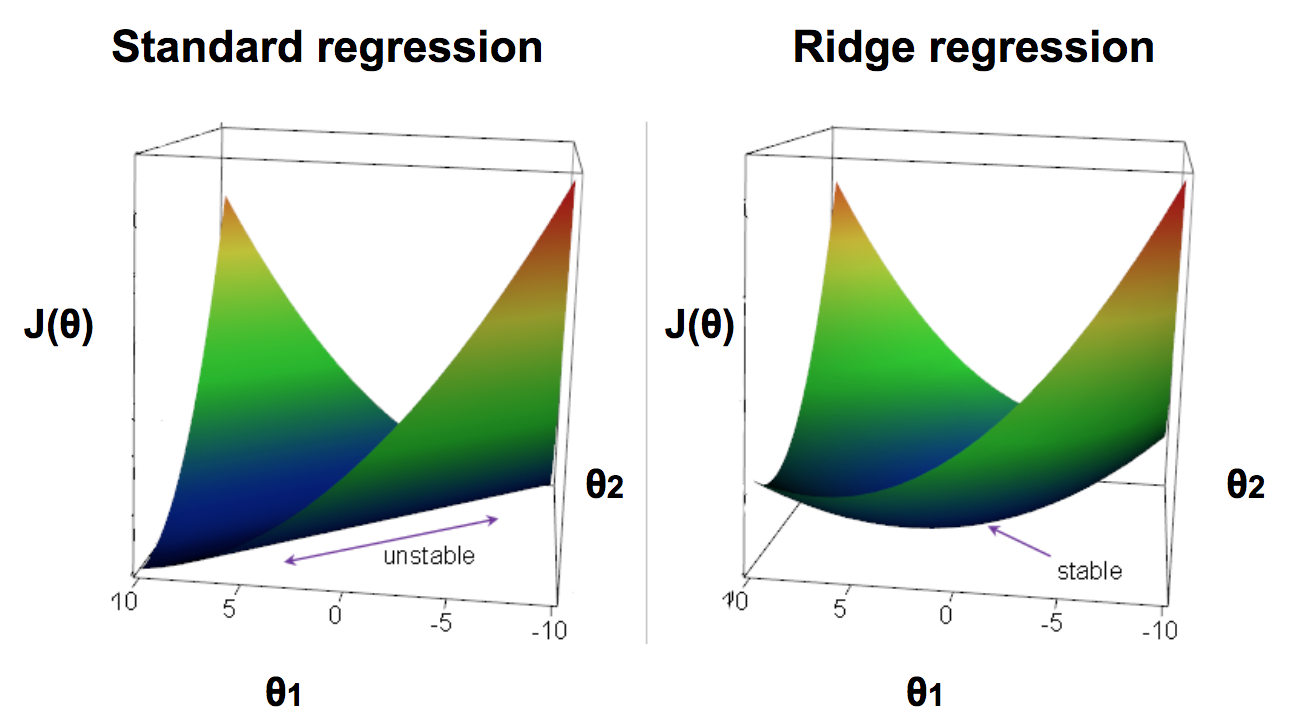

In [25]:
Image('images/ridge.png', width=500)

### Другие регуляризации

Еще на деле часто применяют $Lasso$ или $L1$ регуляризацию:
$$L =\frac{1}{n}(\frac{1}{2}\lVert X\boldsymbol{w} - \boldsymbol{y} \rVert_2^2 + \lambda\lVert \boldsymbol{w} \rVert) \rightarrow \min$$
$\lVert \boldsymbol{w} \rVert = \sum_{i=1}^{n}|w_i|$ - сумма модулей

О том как она выводится можете почитать [сами](https://stats.stackexchange.com/questions/17781/derivation-of-closed-form-lasso-solution).

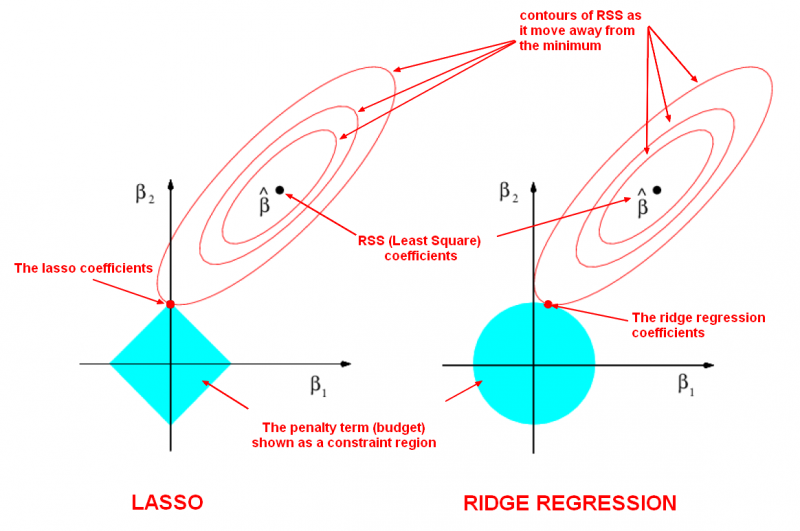

In [26]:
Image('images/lasso_ridge_coefficients.png', width=500)

-------------

# Реальный мир

Мы долго говорили о красивой математике, чтобы сейчас ее разом выбросить. Посмотрим на наше решение

$$\boldsymbol{w} = (X^TX + \lambda E)^{-1}X^{T}\boldsymbol{y}$$

Подсчет обратной матрицы составляет [$O(m^3)$](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0)

Перемножение 2-х матриц (n,k) и (k,m): [$O(nmk)$](https://ru.wikipedia.org/wiki/%D0%A3%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86)

Суммарно у нас затратится $O(n^2m + m + m^3 + nm + m) = O(n^2m + m^3 )$


При $n > 1000000$ мы уже вымрем, а это не такое уж  и большое число объектов для реальных задач мл. Нужно придумать что-то получше.

# 3.4 Градиентный спуск

Давайте вернемся к **градиенту**, который мы считали для регуляризации.

$$ \nabla_{\boldsymbol{w}}L = \frac{1}{n} X^{T}(X\boldsymbol{w} - \boldsymbol{y})$$

Градиент обозначает движение функции на возрастание. Почему бы нам не двигаться против возрастания функции, чтобы достичь минимума?

Пусть мы взяли какую-то точку на нашей гиперплоскости (инициализировали случайные веса) и посчитали градиент в этой точке и решили двигаться в другом направлении?

Для вектора
$$\boldsymbol{w}^{(t+1)} = \boldsymbol{w}^{(t)} - \eta \nabla_{\boldsymbol{w}}L $$

Для элемента вектора
$$w_i^{(t+1)} = w_i^{(t)} - \frac{\eta}{n} \sum_{k=1}^{n} 2x_{k, i}(a(\boldsymbol{x}_k)-y_k) $$


$t$ - номер итерации. 

$\eta$ - learning rate (коэффициент шага обучения)

Такой процесс назовем **градиентным спуском**. Очевидно, что градиентный спуск сходится в какой-нибудь минимум.

Остановиться можно, когда пройдет заданное нами количество итераций, или между соседними весами будет достаточно малый зазор:
$$\lVert \boldsymbol{w}^{(t+1)} - \boldsymbol{w}^{(t)}\rVert < epsilon$$

### Упражнение

Возьмем параболу $f(x) = (x+4)^2$ и начнем градиентный спуск в точке $x = 10$. 
Давайте сойдемся в минимум.

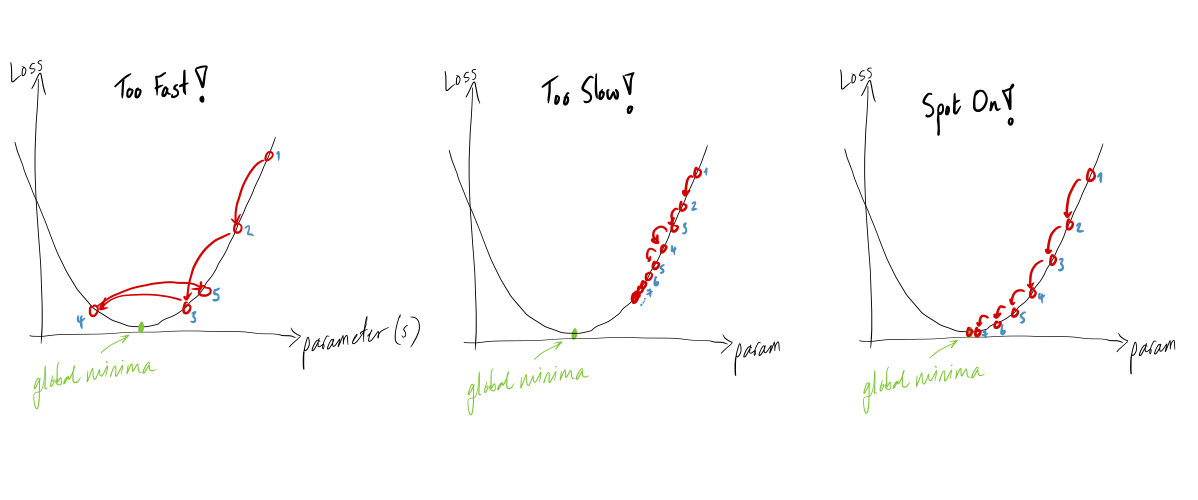

In [22]:
Image('resources/step.png')

Для сложной многомерной функции выглядит как-то так

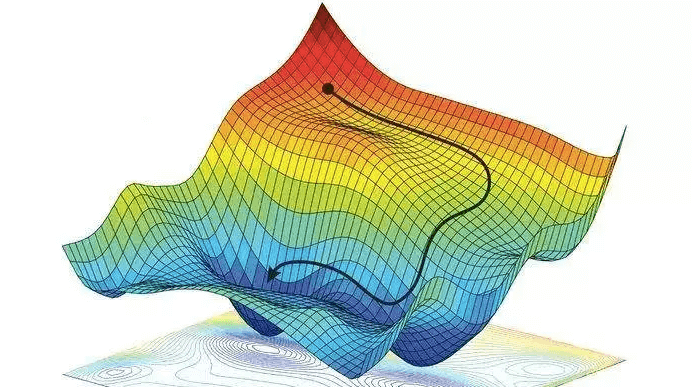

In [24]:
Image('resources/grad.png', width=500)

Однако можем сойтись не в глобальный минимум, а в локальный.

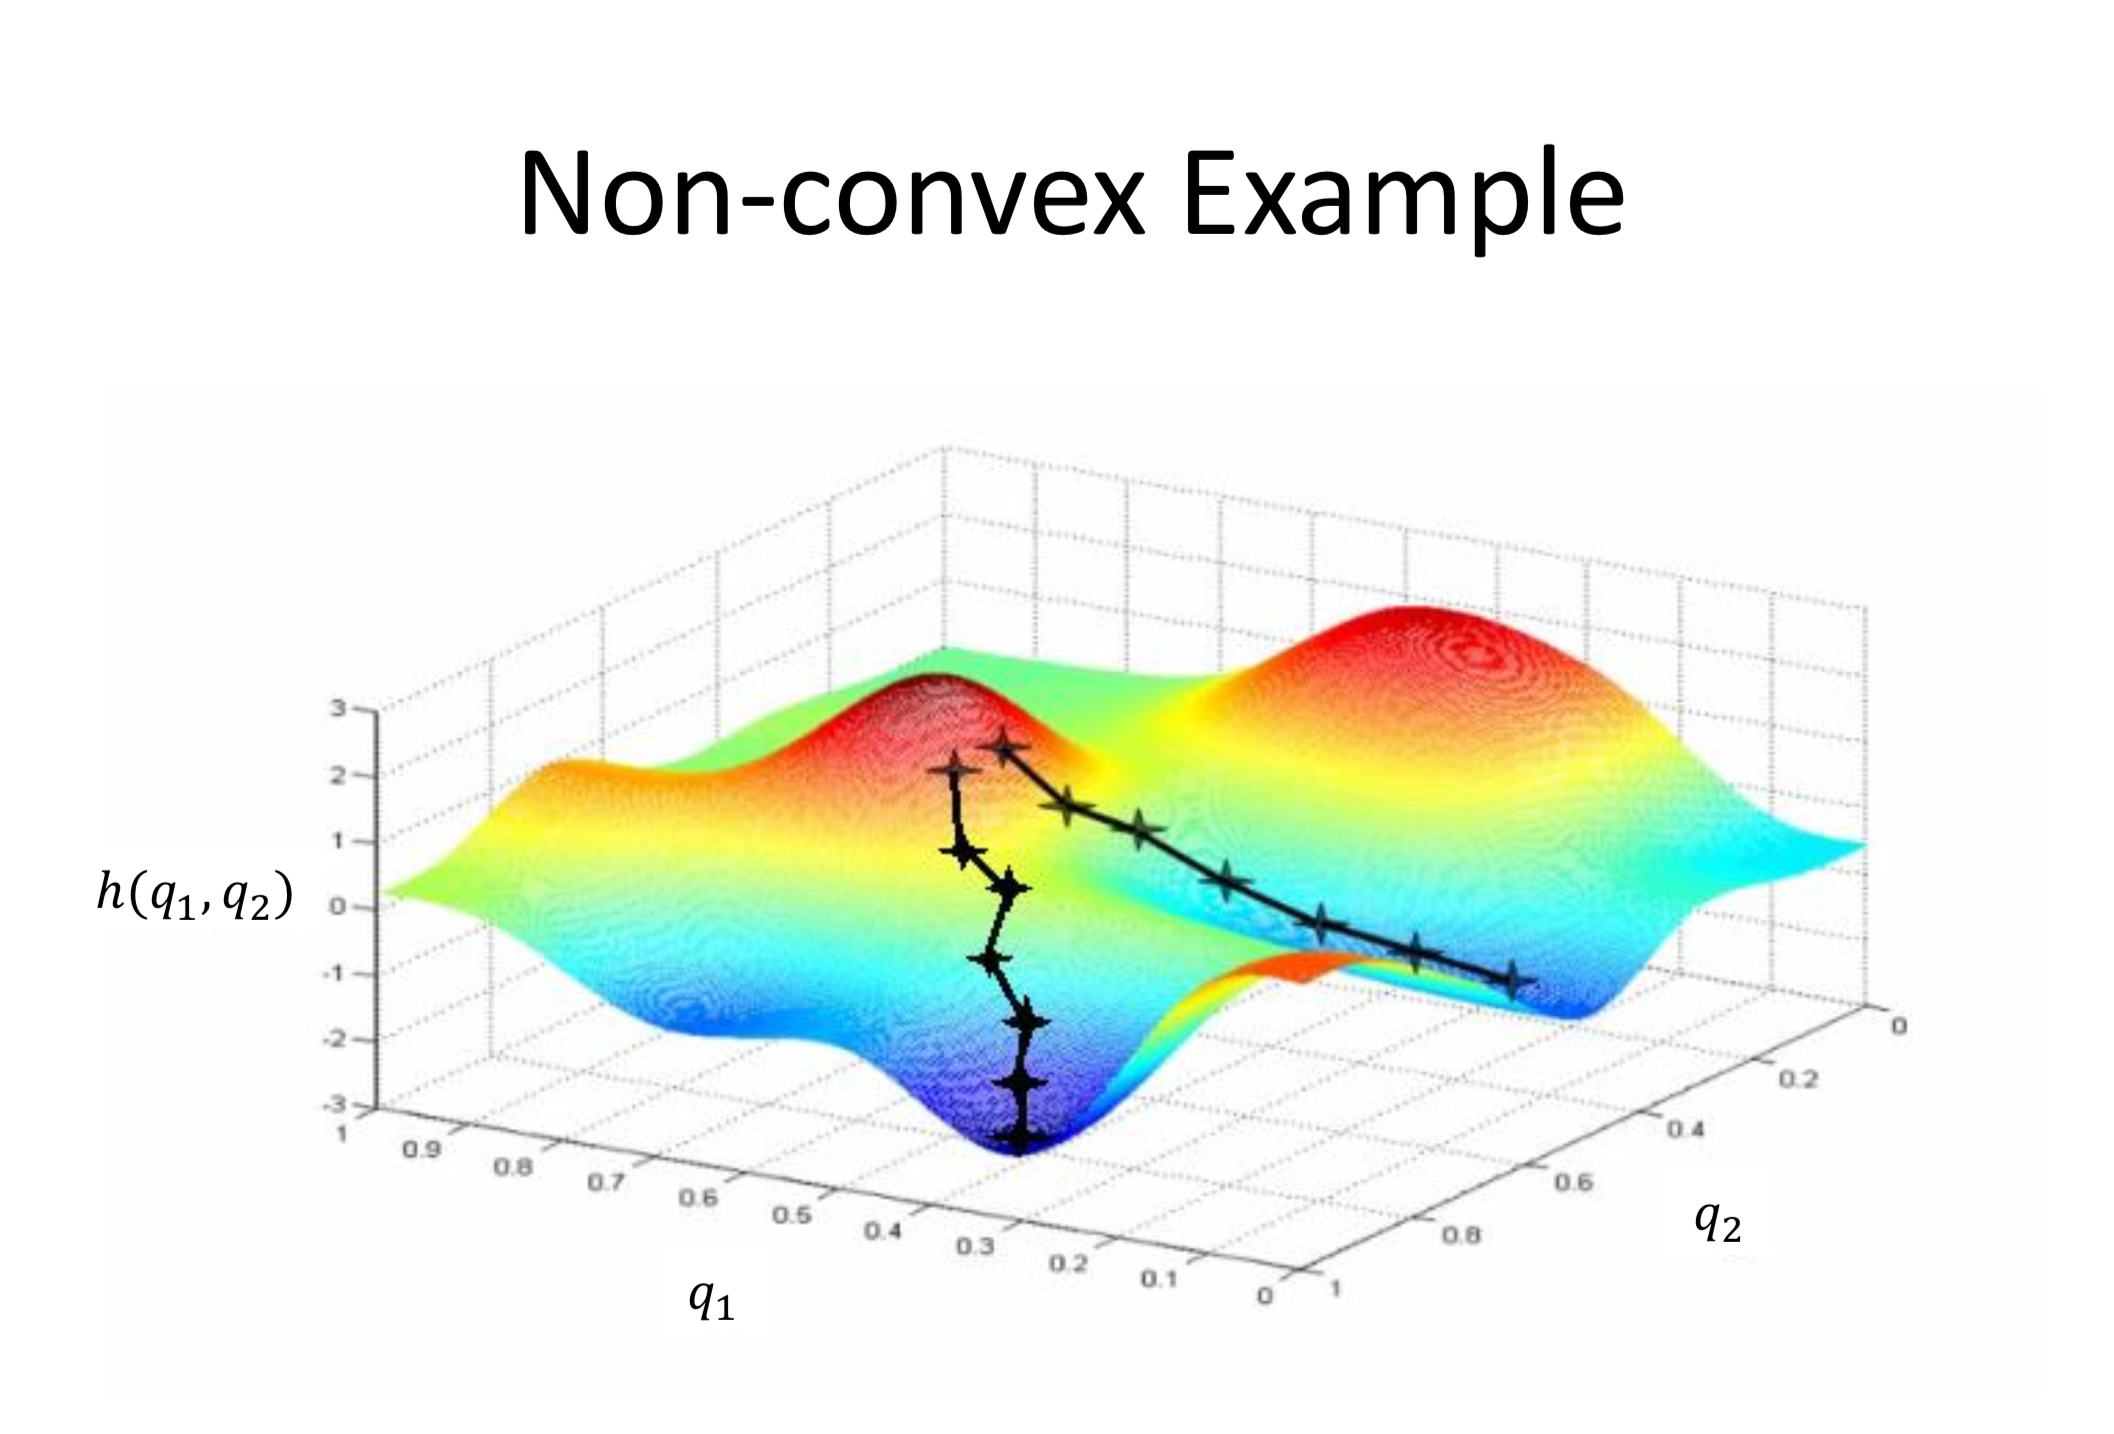

In [23]:
Image('resources/local.png', width=500)

Очень важно выбрать правильный шаг, чтобы достигнуть минимума и не выйти случайно из него. Есть много математических эвристик для выбора шага, но на практике часто его приходится лавировать для определенной задачи.

Однако сложность алгоритма теперь $O(Tn^2)$, где $T$ - количество итераций. Не сильно лучше, чем было в честной регрессии. Но теперь мы можем улучшать конкретно градиентный спуск для ускорения сходимости.

# 3.5 Оптимизации градиентного спуска

## Стохастический градиентный спуск

А давайте теперь не к минимуму всей выборки, а только к **одному произвольному объекту**

Теперь вместо этого
$$ \nabla_{\boldsymbol{w}}L = \frac{2}{n}X^{T}(X\boldsymbol{w} - \boldsymbol{y})$$

Мы получили вот такое для произвольной пары $(\boldsymbol{x}_k, y_k)$

$$ \nabla_{\boldsymbol{w}}L^k = 2(\boldsymbol{x}_k)^{T}(\boldsymbol{x}_k^T\boldsymbol{w} - y_k)$$

**Это не k-ый элемент вектора градиента, это вектор градиента посчитанный только по объекту $\boldsymbol{x}_k$**

Тогда пересчет весов будет происходить соответственно

Для вектора
$$\boldsymbol{w}^{(t+1)} = \boldsymbol{w}^{(t)} - \eta \nabla_{\boldsymbol{w}}L^k$$

Для элемента вектора
$$w_i^{(t+1)} = w_i^{(t)} - \eta 2 x_{k,i}(a(\boldsymbol{x}_k)-y_k) $$

На двойку в целом наплевать

$$w_i^{(t+1)} = w_i^{(t)} - \eta x_{k,i}(a(\boldsymbol{x}_k)-y_k) $$


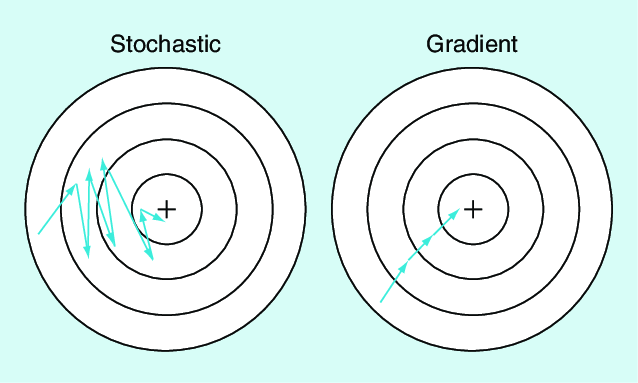

In [13]:
Image('images/sgd.png')

### Возможно мы сильно увеличили число итераций, однако теперь асимптотика алгоритма $O(Tn)$!!!

# 3.6 Логистическая регрессия

Как от задачи регрессии перейти к задаче бинарной классификации? Пусть теперь нам опять нужно построить прямую вида: 
$$a(\boldsymbol{x}_k) = \boldsymbol{x}_k^T\boldsymbol{w}$$

Только теперь необходимо, чтобы она была не как можно ближе к точкам, а как можно лучше разделяла их.

Множество точек $\boldsymbol{x}_k^T\boldsymbol{w} = 0$ является гиперплоскостью и делит пространство на 2 части по разные стороны от этой самой гиперплоскости. При этом объекты, расположенные по разные стороны от неё, полученный классификатор относит к различным классам в зависимости от знака скалярного произведения.

![](https://habrastorage.org/getpro/habr/post_images/555/369/344/5553693449d97a6ccb730f4760a2eacd.png)


Так давайте сделаем функцию 

$$a(\boldsymbol{x}) = sign(\boldsymbol{x}^T\boldsymbol{w})$$

$sign(z)$ - равна 0, если $z < 0$, $1$ если $z > 0$,. 

Вот только эта функция дискретная, а значит недиффиренцируема. Давайте найдем такую функцию, которая **однозначно** переводит $[-\infty, +\infty]$ в $[0, 1]$, то есть получим вероятности принадлежности к классу 1.

В качестве такой функции будем использовать [сигмоиду](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%B3%D0%BC%D0%BE%D0%B8%D0%B4%D0%B0) (иногда называется логистическая функция): $$\sigma(z)=\frac{1}{1+e^{-z}}$$
![](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)


А новый алгоритм пусть теперь выглядит следующим образом:
$$a(x) = \begin{cases}
1, & \sigma(\boldsymbol{x}^T\boldsymbol{w}) > 0.5 \\ 
0, & \sigma(\boldsymbol{x}^T\boldsymbol{w}) < 0.5 \\ 
\end{cases}$$

Получили вероятность для $k$- го объекта:
$$P(y^{pred}_k=1|\boldsymbol{x}_k) = \sigma(\boldsymbol{x}_k^T\boldsymbol{w})$$

Это мы нашли вероятность того, что значение, которое мы предскажем, будет находиться в классе 1. Давайте теперь немного обобщим эту функцию. 
* $pred$ - предсказанное значение
* $real$ - реальное значение из выборки

$$P(y^{pred}_{k}=y^{real}_k|\boldsymbol{x}_k) = \sigma(\boldsymbol{x}_k^T\boldsymbol{w})^{y^{real}_k}(1 - \sigma(\boldsymbol{x}_k^T\boldsymbol{w}))^{1 - y^{real}_k}$$ 

Данная функция корректна, так как $y \in \{0, 1\}$

Окей, а какой функционал будем минимизировать?

А давайте найдем функцию правдоподобия:

$$Likelihood = \prod_{k=1}^{n}P(y^{pred}_k=y^{real}_k|\boldsymbol{x}_k) \rightarrow \max$$

И сделаем с ней единственное возможное действие - логарифмируем

$$\ln{Likelihood} =\sum_{k=1}^{n}\ln P(y^{pred}_{k}=y^{real}_k|\boldsymbol{x}_{k}) = $$
$$ = \sum_{k=1}^{n} y^{real}_k\ln\sigma(\boldsymbol{x}_k^T\boldsymbol{w}) + (1 - y^{real}_k)\ln(1 - \sigma(\boldsymbol{x}_k^T\boldsymbol{w})) =$$
$$= \sum_{k=1}^{n} y^{real}_k\ln p + (1 - y^{real}_k)\ln(1 - p)$$ 

Этот функционал называется $Logloss$. Так как функцию правдоподобия нужно максимизировать, чтобы получить наилучший результат. Мы будем минимизировать отрицательное правдоподобие, чтобы получить функционал минимизации.

$$Q(w) = -lnL \rightarrow \min$$

И вот уже эту функцию можно использовать для градиентного спуска, с помощью которого будем искать наилучшие веса:
$$\boldsymbol{w}^{t+1} = \boldsymbol{w}^{t} - \eta \nabla_{\boldsymbol{w}}\ln{L}$$

# 3.7 Немного практики:)

In [1]:
from sklearn.linear_model import Ridge, Lasso, SGDClassifier, SGDRegressor, LogisticRegression, LinearRegression


In [2]:
SGDClassifier(loss='')

sklearn.linear_model._stochastic_gradient.SGDClassifier

In [3]:
m = LogisticRegression()
n = LinearRegression()